In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


%matplotlib inline
plt.style.use('seaborn-whitegrid')


/tmp/ipykernel_18/1295369242.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Importing the data

In [2]:
df= pd.read_csv("/kaggle/input/loandefault/train.csv")

In [3]:
df.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,...,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,...,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,...,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,...,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,...,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


# Data Cleaning

### Dropping Unnecessary Columns

In the initial stage of data cleaning, I removed columns that will not be included in the subsequent multiple regression analysis.

<span style="color:blue">*Insight: Streamlining the dataset by eliminating irrelevant columns for focused analysis.*</span>

### Addressing Mismatch in Employment Duration

Upon closer examination, I identified a discrepancy in the "Employment Duration" column and its values. To enhance clarity and maintain consistency, I decided to relabel it as "Home Ownership."

<span style="color:orange">*Note: Renaming the column to "Home Ownership" for improved accuracy and coherence.*</span>

### Renaming Columns for Accessibility

To improve accessibility and understanding, I chose to rename certain columns for a more intuitive and descriptive representation.


In [4]:
df.head(10)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
5,50509046,34631,30203,8635.931613,36,BAT4694572,17.246986,B,G5,RENT,...,5.043575,0.581688,0,INDIVIDUAL,32,0,42,51252,27480,0
6,32737431,30844,19773,15777.511830,59,BAT4808022,10.731432,C,C5,RENT,...,3.167937,0.553076,0,INDIVIDUAL,71,0,3388,42069,31068,0
7,63151650,20744,10609,7645.014802,58,BAT2558388,13.993688,A,A5,OWN,...,0.098448,0.047589,0,INDIVIDUAL,87,0,48,184909,43303,0
8,4279662,9299,11238,13429.456610,59,BAT5341619,11.178457,G,C2,MORTGAGE,...,0.530214,0.216985,0,INDIVIDUAL,144,0,26,68126,7482,0
9,4431034,19232,8962,7004.097481,58,BAT2078974,5.520413,C,B5,RENT,...,2.912215,0.886864,0,INDIVIDUAL,9,0,35,71650,14871,0


In [5]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [7]:
df.drop(['ID','Batch Enrolled','Revolving Utilities','Application Type'],axis=1,inplace=True)

In [8]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Grade', 'Sub Grade', 'Employment Duration',
       'Home Ownership', 'Verification Status', 'Payment Plan', 'Loan Title',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account', 'Public Record', 'Revolving Balance', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [9]:
df.head(10)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,3609,11940,12191.996920,59,12.237563,C,D3,RENT,39833.92100,Source Verified,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,28276,9311,21603.224550,59,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,11170,6954,17877.155850,59,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,16890,13226,13539.926670,59,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0
5,34631,30203,8635.931613,36,17.246986,B,G5,RENT,98957.47561,Not Verified,...,0.088584,5.043575,0.581688,0,32,0,42,51252,27480,0
6,30844,19773,15777.511830,59,10.731432,C,C5,RENT,102391.82430,Verified,...,0.083528,3.167937,0.553076,0,71,0,3388,42069,31068,0
7,20744,10609,7645.014802,58,13.993688,A,A5,OWN,61723.52014,Not Verified,...,0.044965,0.098448,0.047589,0,87,0,48,184909,43303,0
8,9299,11238,13429.456610,59,11.178457,G,C2,MORTGAGE,63205.09072,Verified,...,0.017106,0.530214,0.216985,0,144,0,26,68126,7482,0
9,19232,8962,7004.097481,58,5.520413,C,B5,RENT,42015.46586,Source Verified,...,0.008338,2.912215,0.886864,0,9,0,35,71650,14871,0


In [10]:
df.rename({"Employment Duration":"HomeOwnership", "Total Current Balance":"Balance", "Loan Status":"Defaulted",'Loan Amount':"Amount"},axis=1, inplace=True)
df.rename({"Home Ownership":"Salary"},axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   HomeOwnership                 67463 non-null  object 
 8   Salary                        67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Payment Plan                  67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

### Third, Dropping NaN Values

As the next step in our data cleaning process, we will check for and drop any missing values (NaN). Fortunately, the dataset is complete, and all values are valid.

<span style="color:green">*Note: The absence of NaN values ensures the integrity and reliability of our dataset for subsequent analyses.*</span>
### Third,  we will drop Na values but fortunately the data is all valid

In [12]:
df.isna().sum()

Amount                          0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Interest Rate                   0
Grade                           0
Sub Grade                       0
HomeOwnership                   0
Salary                          0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Last week Pay                   0
Accounts Delinquent             0
Total Collection Amount         0
Balance                         0
Total Revolvin

### Consolidating Verification Status

The "Verification Status" column currently contains three distinct values (Not Verified, Verified, Source Verified). To simplify our analysis, we will merge 'Source Verified' and 'Verified' into a single category named "Verified."

<span style="color:purple">*Note: This consolidation streamlines our data and enhances clarity in the verification status classification.*</span>


In [13]:
df['Verification Status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [14]:
df.loc[df['Verification Status']=='Source Verified','Verification Status']= 'Verified'

In [15]:
df['Verification Status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

###

In [16]:
df.head(10)

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,HomeOwnership,Salary,Verification Status,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted
0,10000,32236,12329.362860,59,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,...,0.102055,2.498291,0.793724,0,49,0,31,311301,6619,0
1,3609,11940,12191.996920,59,12.237563,C,D3,RENT,39833.92100,Verified,...,0.036181,2.377215,0.974821,0,109,0,53,182610,20885,0
2,28276,9311,21603.224550,59,12.545884,F,D4,MORTGAGE,91506.69105,Verified,...,18.778660,4.316277,1.020075,0,66,0,34,89801,26155,0
3,11170,6954,17877.155850,59,16.731201,C,C3,MORTGAGE,108286.57590,Verified,...,0.044131,0.107020,0.749971,0,39,0,40,9189,60214,0
4,16890,13226,13539.926670,59,15.008300,C,D4,MORTGAGE,44234.82545,Verified,...,19.306646,1294.818751,0.368953,0,18,0,430,126029,22579,0
5,34631,30203,8635.931613,36,17.246986,B,G5,RENT,98957.47561,Not Verified,...,0.088584,5.043575,0.581688,0,32,0,42,51252,27480,0
6,30844,19773,15777.511830,59,10.731432,C,C5,RENT,102391.82430,Verified,...,0.083528,3.167937,0.553076,0,71,0,3388,42069,31068,0
7,20744,10609,7645.014802,58,13.993688,A,A5,OWN,61723.52014,Not Verified,...,0.044965,0.098448,0.047589,0,87,0,48,184909,43303,0
8,9299,11238,13429.456610,59,11.178457,G,C2,MORTGAGE,63205.09072,Verified,...,0.017106,0.530214,0.216985,0,144,0,26,68126,7482,0
9,19232,8962,7004.097481,58,5.520413,C,B5,RENT,42015.46586,Verified,...,0.008338,2.912215,0.886864,0,9,0,35,71650,14871,0


### Rounding Interest Rate Values

To further streamline our analysis, we will adjust the interest rate values by rounding them up to their ceiling values.

<span style="color:orange">*Note: Rounding interest rates to their ceil values helps simplify numerical precision and facilitates a more straightforward interpretation of the data.*</span>


In [17]:
df['Interest Rate']=np.ceil(df['Interest Rate'])

### Next, we will categorize loans amounts to 4 categories: (Micro, Small, Medium, Big)

In [18]:
def amount_map(amount):
    if amount<15000:
        return 'Small'
    if amount<25000:
        return 'Medium'
    else: return 'Big'

In [19]:
df['Loan Category']= df.Amount.map(amount_map)

In [20]:
df

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,HomeOwnership,Salary,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted,Loan Category
0,10000,32236,12329.36286,59,12.0,B,C4,MORTGAGE,176346.62670,Not Verified,...,2.498291,0.793724,0,49,0,31,311301,6619,0,Small
1,3609,11940,12191.99692,59,13.0,C,D3,RENT,39833.92100,Verified,...,2.377215,0.974821,0,109,0,53,182610,20885,0,Small
2,28276,9311,21603.22455,59,13.0,F,D4,MORTGAGE,91506.69105,Verified,...,4.316277,1.020075,0,66,0,34,89801,26155,0,Big
3,11170,6954,17877.15585,59,17.0,C,C3,MORTGAGE,108286.57590,Verified,...,0.107020,0.749971,0,39,0,40,9189,60214,0,Small
4,16890,13226,13539.92667,59,16.0,C,D4,MORTGAGE,44234.82545,Verified,...,1294.818751,0.368953,0,18,0,430,126029,22579,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,10.0,C,A4,MORTGAGE,83961.15003,Verified,...,564.614852,0.865230,0,69,0,48,181775,34301,1,Small
67459,8323,11046,15637.46301,59,10.0,C,B3,RENT,65491.12817,Verified,...,2.015494,1.403368,0,14,0,37,22692,8714,0,Small
67460,15897,32921,12329.45775,59,20.0,A,F3,MORTGAGE,34813.96985,Verified,...,5.673092,1.607093,0,137,0,17,176857,42330,0,Medium
67461,16567,4975,21353.68465,59,14.0,D,E3,OWN,96938.83564,Not Verified,...,1.157454,0.207608,0,73,0,61,361339,39075,0,Medium


In [21]:
df.describe()

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Salary,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted
count,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,16848.902776,15770.599114,14621.799323,58.173814,12.345908,80541.502522,23.299241,0.327127,0.145754,14.266561,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,8367.865726,8150.992662,6785.345170,3.327441,3.731843,45029.120366,8.451824,0.800888,0.473291,6.225060,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1014.000000,1014.000000,1114.590204,36.000000,6.000000,14573.537170,0.675299,0.000000,0.000000,2.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,10012.000000,9266.500000,9831.684984,58.000000,10.000000,51689.843335,16.756416,0.000000,0.000000,10.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,16073.000000,13042.000000,12793.682170,59.000000,12.000000,69335.832680,22.656658,0.000000,0.000000,13.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,22106.000000,21793.000000,17807.594120,59.000000,15.000000,94623.322785,30.048400,0.000000,0.000000,16.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,35000.000000,34999.000000,34999.746430,59.000000,28.000000,406561.536400,39.629862,8.000000,5.000000,37.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [22]:
df.groupby('Loan Category').count()

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,HomeOwnership,Salary,Verification Status,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted
Loan Category,,,,,,,,,,,,,,,,,,,,,
Big,12896,12896,12896,12896,12896,12896,12896,12896,12896,12896,...,12896,12896,12896,12896,12896,12896,12896,12896,12896,12896
Medium,25233,25233,25233,25233,25233,25233,25233,25233,25233,25233,...,25233,25233,25233,25233,25233,25233,25233,25233,25233,25233
Small,29334,29334,29334,29334,29334,29334,29334,29334,29334,29334,...,29334,29334,29334,29334,29334,29334,29334,29334,29334,29334


# Data Visualization

## Number of Loans based on the Grade

Upon visualizing the data, it becomes evident that Grades "B" and "C" are associated with the highest number of loans, whereas Grade "G" is rarely observed in loan applications.

<span style="color:blue">*Insight: The visualization underscores the impact of the Grade on loan distribution, suggesting that certain Grades may influence the likelihood of loan approval.*</span>


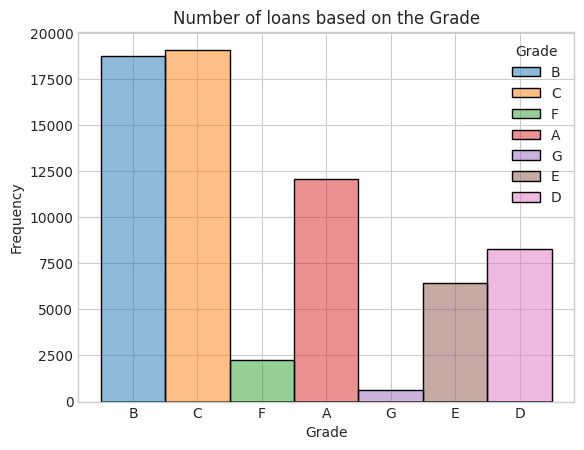

In [23]:
sns.histplot(x='Grade', hue="Grade",data=df)
plt.title("Number of loans based on the Grade")
plt.ylabel('Frequency');

### Loan Default based on Grade

Upon analyzing loan default rates, it is apparent that loans with a Grade of "G" exhibit the highest probability of default. Additionally, it's noteworthy that Grade "G" also demonstrates the highest deviation in default rates.

<span style="color:red">*Insight: The observed trend suggests that the Grade of a loan plays a significant role in predicting the likelihood of default, with Grade "G" presenting the highest risk. The elevated deviation underscores potential variability in default rates within this grade.*</span>


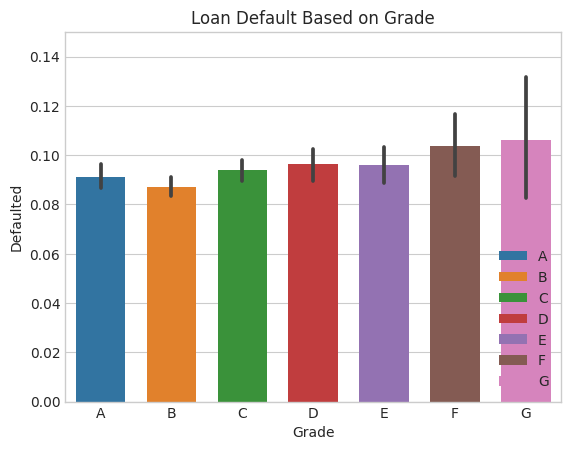

In [24]:
sns.barplot(x=df.Grade.sort_values(),y="Defaulted", data=df,width=0.7,label=df.Grade.sort_values().unique())
plt.ylim(0,0.15)
plt.title('Loan Default Based on Grade')
plt.legend(loc='lower right');


### Interest Rate vs. Default Rate

In our exploration of the relationship between interest rates and default rates, we calculated the mean balances grouped by interest rates.

<span style="color:purple">*Insight: While the account balance does not exhibit a significant effect on loan interest rates, a noteworthy observation is that individuals with lower account balances tend to have an increased likelihood of defaulting.*</span>


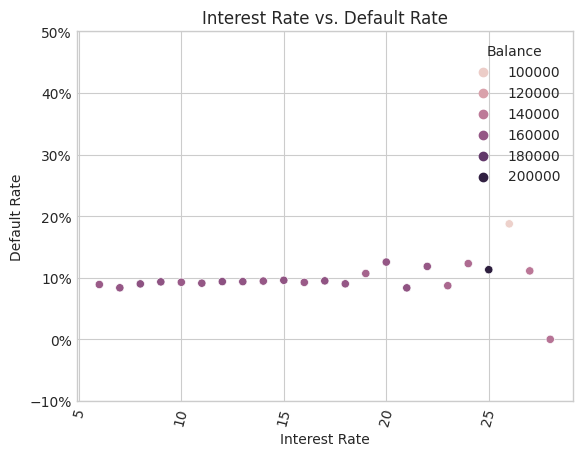

In [25]:
import matplotlib.ticker as mtick

sns.scatterplot(x=df['Interest Rate'].unique(),y=df.groupby('Interest Rate')['Defaulted'].mean(), hue=df.groupby('Interest Rate')['Balance'].mean())
plt.plot()
plt.ylim(-0.1,0.5)
plt.title('Interest Rate vs. Default Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Default Rate')
plt.xticks(rotation=75)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));

### Account Balance based on Loan Grade

Upon analyzing account balances grouped by loan grades, we observe minimal differences in average account balances among the various grades. However, a notable finding is the substantial standard deviation in account balances for Grade 'G.'

<span style="color:orange">*Insight: While average account balances show little variation across different loan grades, the pronounced standard deviation in Grade 'G' suggests significant variability in the account balances within this specific grade.*</span>


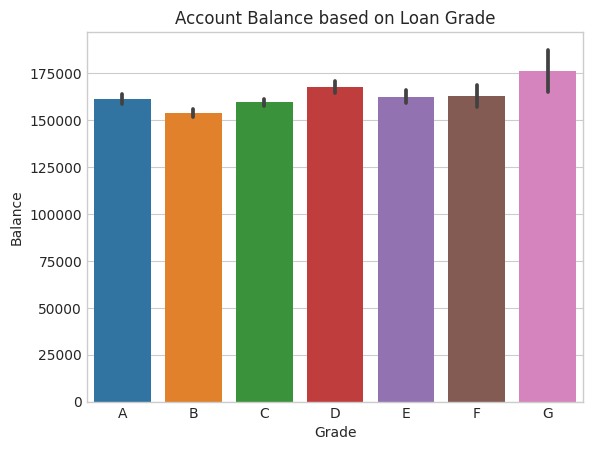

In [26]:
sns.barplot(x=df.Grade.sort_values(),y="Balance", data=df)
plt.title('Account Balance based on Loan Grade');

### Home Ownership vs. Default Rate

Our analysis reveals that individuals owning a home are more prone to default on their loans. Additionally, those with home ownership and an "F" grade loan exhibit the highest likelihood of loan default. However, it's important to note that this subgroup also displays the highest standard deviation.

<span style="color:blue">*Insight: The data suggests a correlation between home ownership and loan default, with individuals possessing a home and holding an "F" grade loan facing the highest probability of default. The elevated standard deviation highlights potential variability within this specific subgroup.*</span>


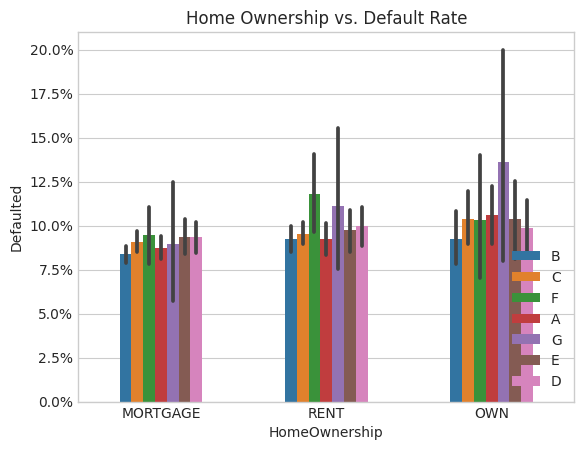

In [27]:
sns.barplot(x=df.HomeOwnership, y=df.Defaulted,data=df,hue='Grade',width=0.5)
plt.legend(loc='lower right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.title("Home Ownership vs. Default Rate");


### Loan Amount vs. Default Rate

Upon examination, it is evident that medium-sized loans exhibit the lowest default rates.

<span style="color:green">*Insight: The data indicates that loans with medium amounts are associated with the lowest likelihood of default, emphasizing a potential correlation between loan size and default rates.*</span>


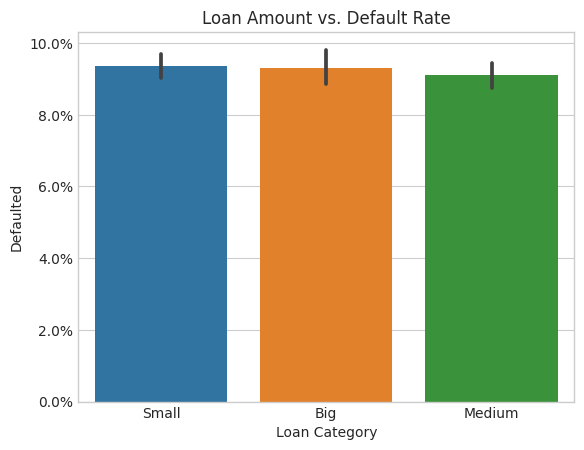

In [28]:
sns.barplot(x=df["Loan Category"], y=df['Defaulted'], data=df)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0));
plt.title("Loan Amount vs. Default Rate");

# Logistical Regression

In [29]:
df.Salary

0        176346.62670
1         39833.92100
2         91506.69105
3        108286.57590
4         44234.82545
             ...     
67458     83961.15003
67459     65491.12817
67460     34813.96985
67461     96938.83564
67462    105123.15580
Name: Salary, Length: 67463, dtype: float64

In [30]:
df.head()

,Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,HomeOwnership,Salary,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Balance,Total Revolving Credit Limit,Defaulted,Loan Category
0,10000,32236,12329.36286,59,12.0,B,C4,MORTGAGE,176346.62670,Not Verified,...,2.498291,0.793724,0,49,0,31,311301,6619,0,Small
1,3609,11940,12191.99692,59,13.0,C,D3,RENT,39833.92100,Verified,...,2.377215,0.974821,0,109,0,53,182610,20885,0,Small
2,28276,9311,21603.22455,59,13.0,F,D4,MORTGAGE,91506.69105,Verified,...,4.316277,1.020075,0,66,0,34,89801,26155,0,Big
3,11170,6954,17877.15585,59,17.0,C,C3,MORTGAGE,108286.57590,Verified,...,0.107020,0.749971,0,39,0,40,9189,60214,0,Small
4,16890,13226,13539.92667,59,16.0,C,D4,MORTGAGE,44234.82545,Verified,...,1294.818751,0.368953,0,18,0,430,126029,22579,0,Medium


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   HomeOwnership                 67463 non-null  object 
 8   Salary                        67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Payment Plan                  67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

## Correlation Test

### No Observable Correlation between Variables

Following a correlation test, no significant correlation was found between the analyzed variables.

<span style="color:gray">*Note: The absence of correlation suggests that the variables under consideration do not exhibit a linear relationship with each other.*</span>


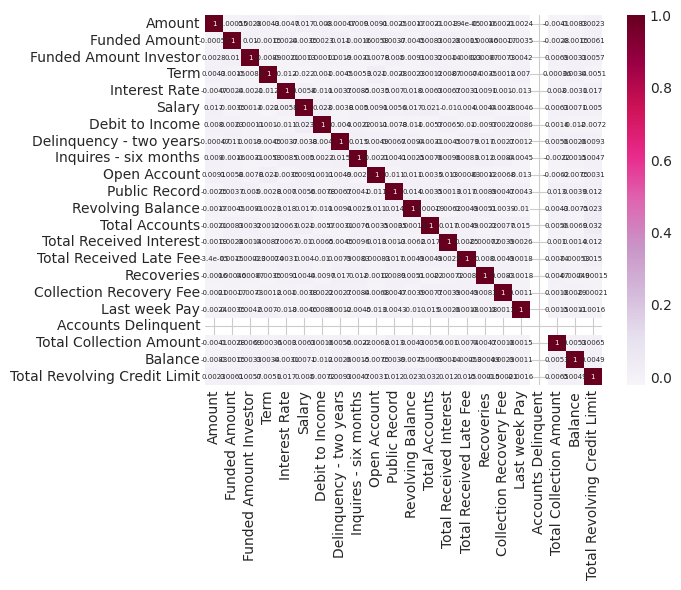

In [32]:
corr = df[['Amount','Funded Amount',"Funded Amount Investor",'Term','Interest Rate','Salary','Debit to Income'
          ,'Delinquency - two years',"Inquires - six months","Open Account","Public Record",'Revolving Balance'
          ,'Total Accounts','Total Received Interest',"Total Received Late Fee",'Recoveries',
          'Collection Recovery Fee','Last week Pay','Accounts Delinquent',"Total Collection Amount","Balance",
          "Total Revolving Credit Limit"]].corr()
sns.heatmap(corr, cmap = 'PuRd', annot= True,annot_kws={"size":5});

## Normal Distribution

### Columns That Follow a Normal Distribution

Upon analyzing the distribution of (Amount, Debit to Income, Last Week Pay), it is evident that the data follows a normal distribution. As a result, there is no necessity to employ a log scale for this dataset.

<span style="color:purple">*Insight: The normal distribution of these columns indicates that the data conforms to a standard statistical distribution, alleviating the need for logarithmic scaling.*</span>


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   HomeOwnership                 67463 non-null  object 
 8   Salary                        67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Payment Plan                  67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

/tmp/ipykernel_18/4142994825.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col=cm.get_cmap('turbo')


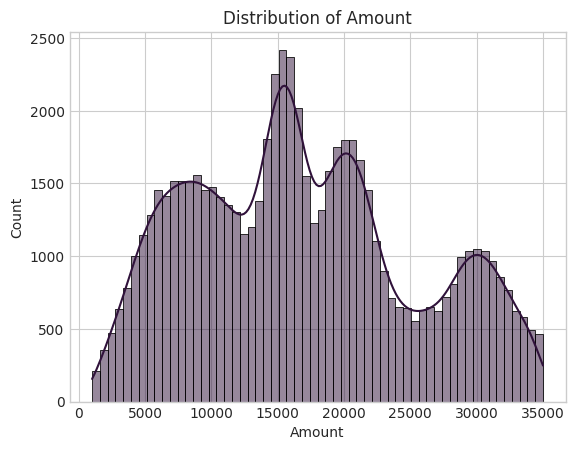

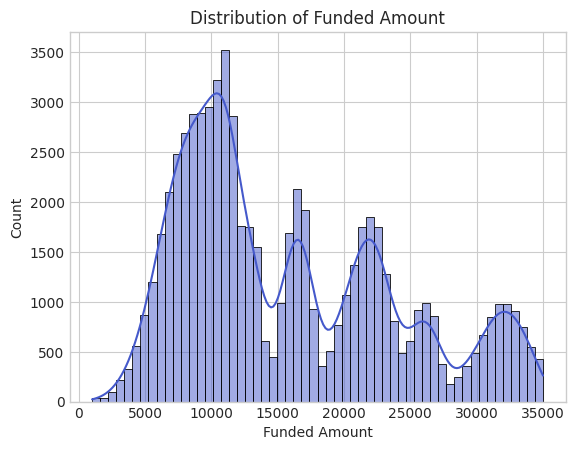

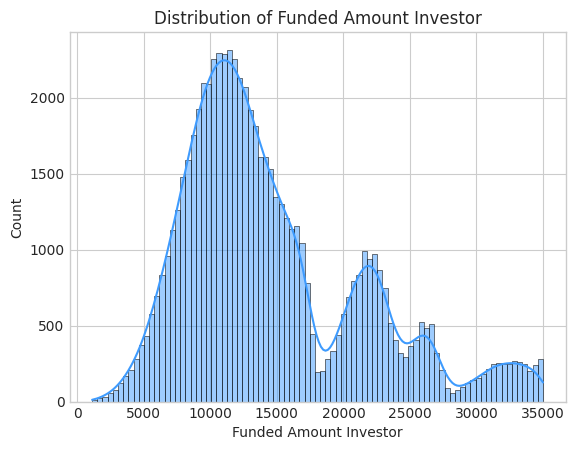

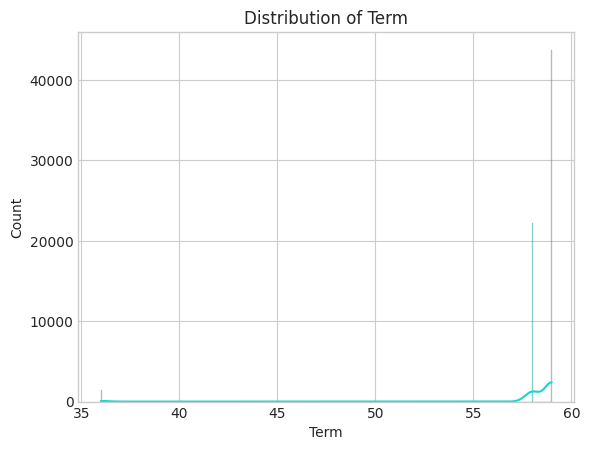

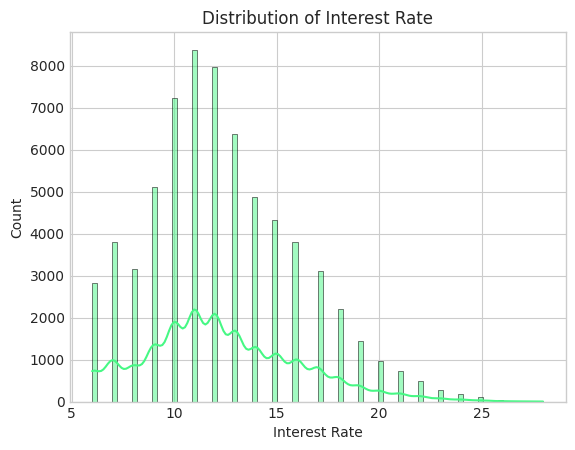

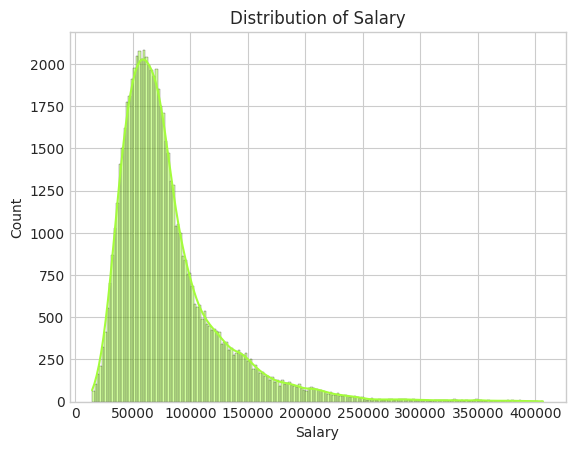

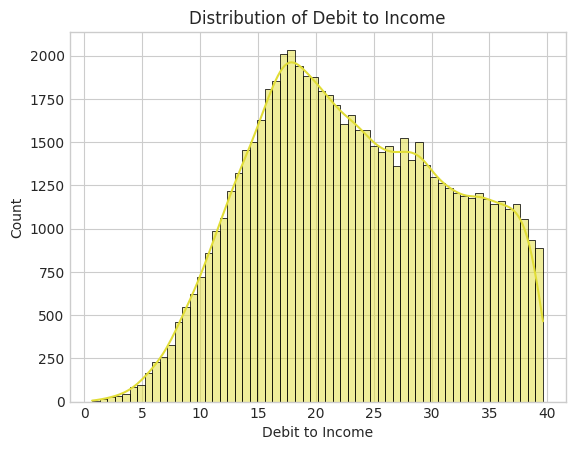

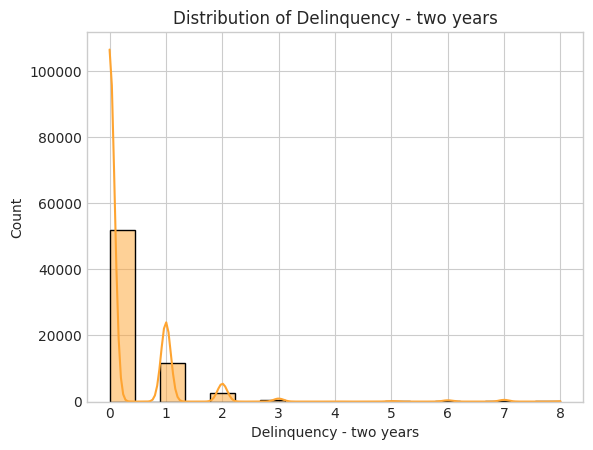

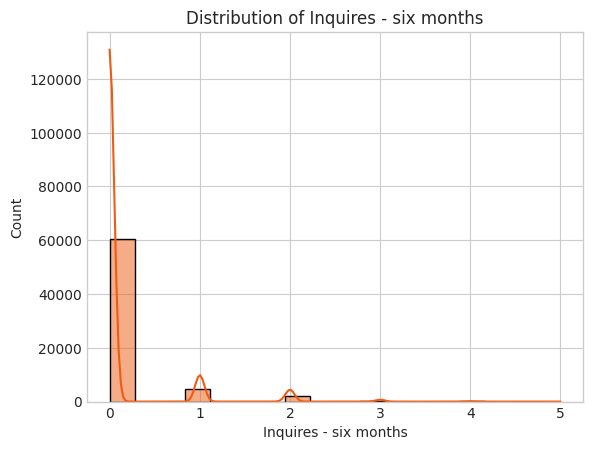

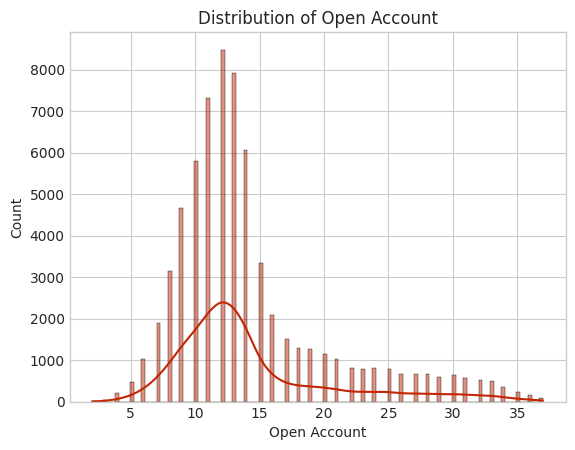

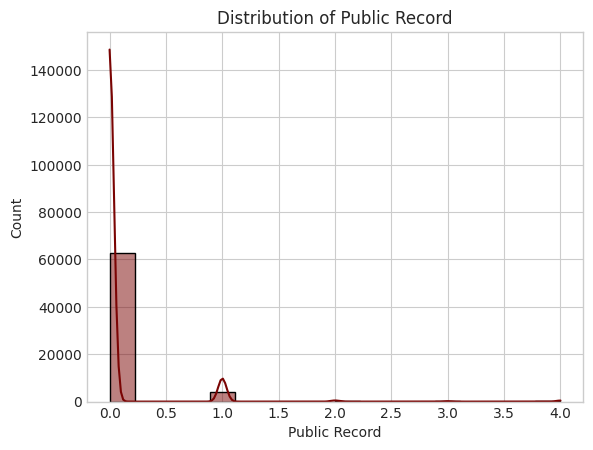

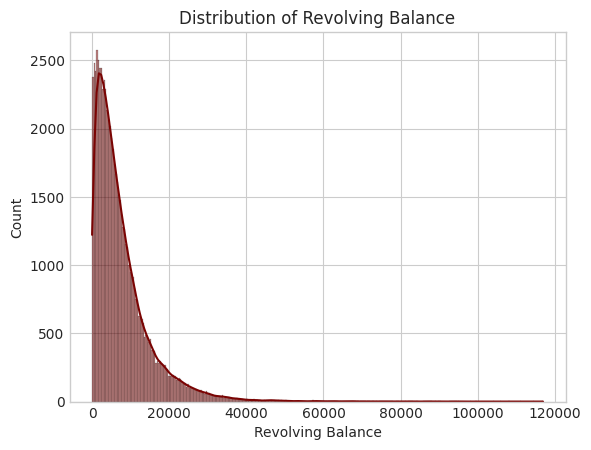

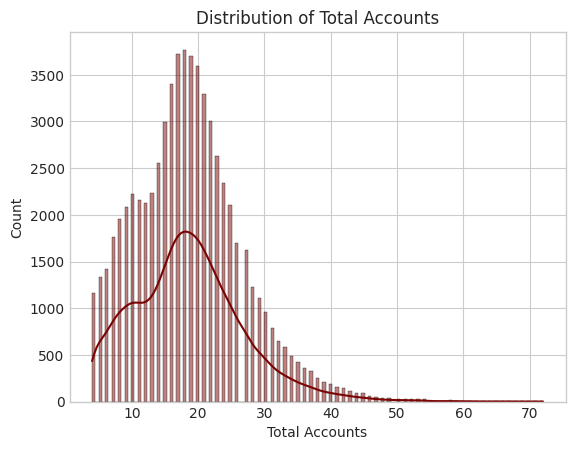

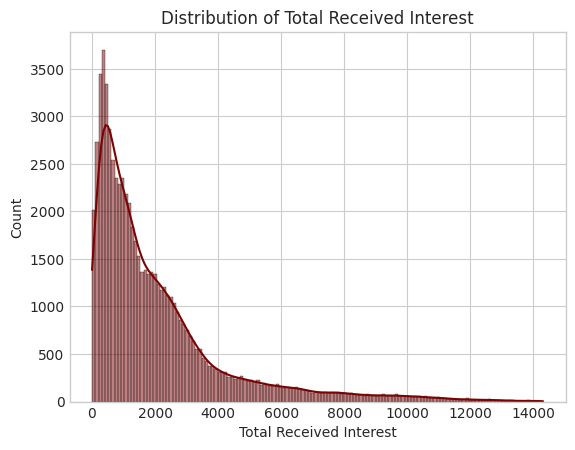

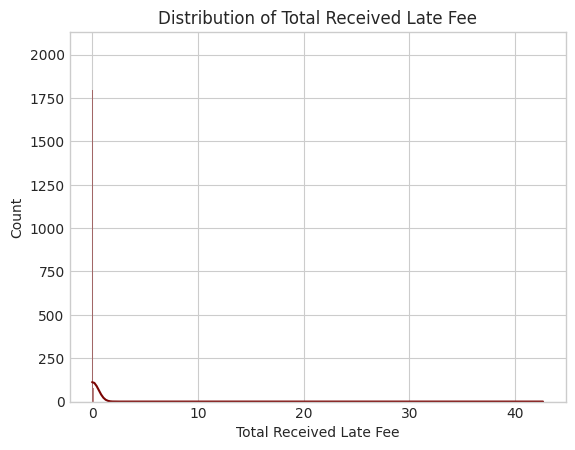

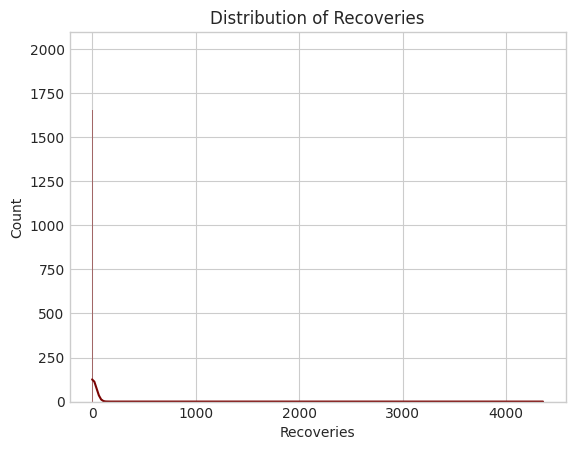

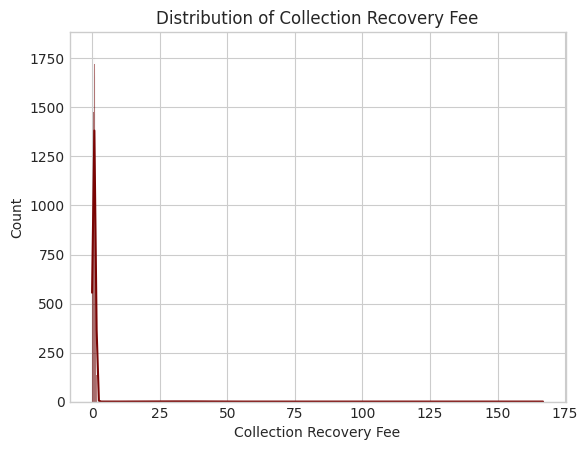

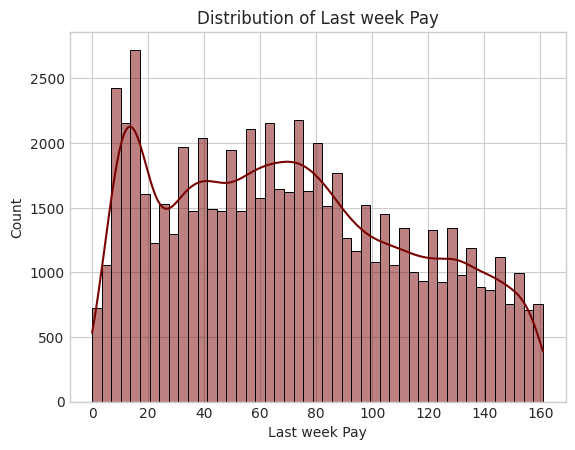

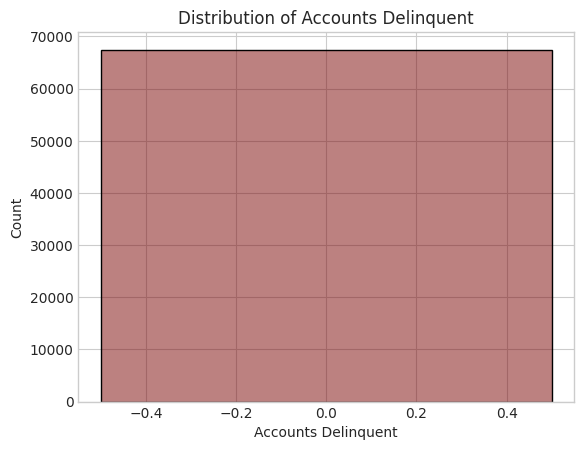

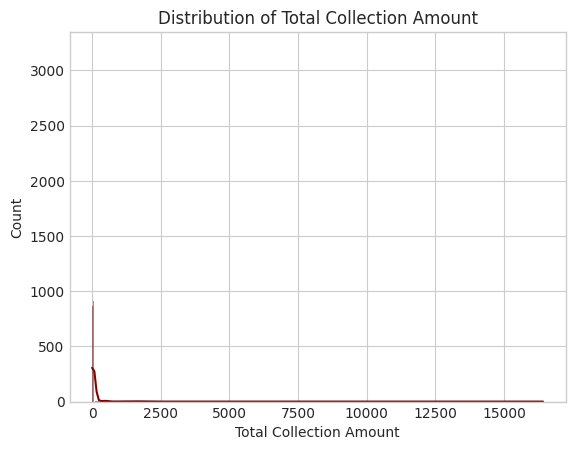

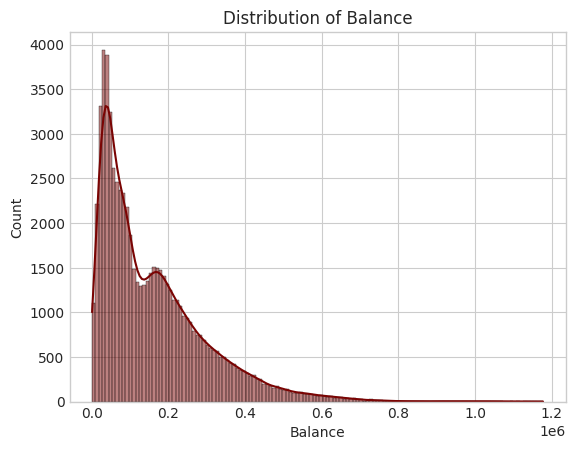

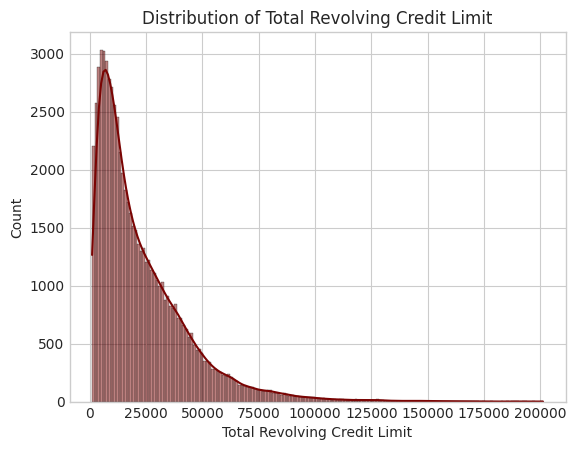

In [34]:
from matplotlib import cm
df_integ=df.drop(['Grade','Sub Grade','HomeOwnership','Verification Status','Payment Plan','Loan Title','Initial List Status',
                 'Loan Category'],axis=1)
columns=['Amount','Funded Amount',"Funded Amount Investor",'Term','Interest Rate','Salary','Debit to Income'
          ,'Delinquency - two years',"Inquires - six months","Open Account","Public Record",'Revolving Balance'
          ,'Total Accounts','Total Received Interest',"Total Received Late Fee",'Recoveries',
          'Collection Recovery Fee','Last week Pay','Accounts Delinquent',"Total Collection Amount","Balance",
          "Total Revolving Credit Limit"]
col=cm.get_cmap('turbo')
val=0
for i in columns:
    sns.histplot(x=df_integ[i], kde=True,color=col(val))
    plt.title('Distribution of '+i)
    plt.show()
    val+=0.1

## Log Scale Normal Distribution

### Columns That Follow a Normal Distribution

Upon analyzing the distribution of (Funded Amount Investor, Interest Rate, Salary, Distribution of Inquiries, Open Accounts, Revolving Balance, Total Accounts, Total Received Interest, Total Received Late Fee, Recoveries, Collection Recovery, Total Collection Ammount), it is evident that the data follows a normal distribution. As a result, there is no necessity to employ a log scale for this dataset.

<span style="color:purple">*Insight: The normal distribution of these columns indicates that the data conforms to a standard statistical distribution, alleviating the need for logarithmic scaling.*</span>


/tmp/ipykernel_18/2005137674.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col=cm.get_cmap('hsv')


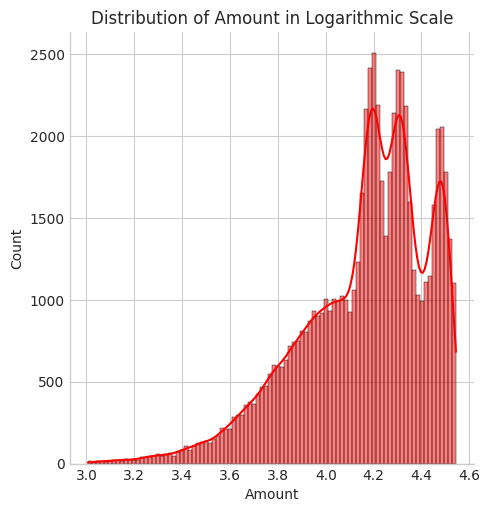

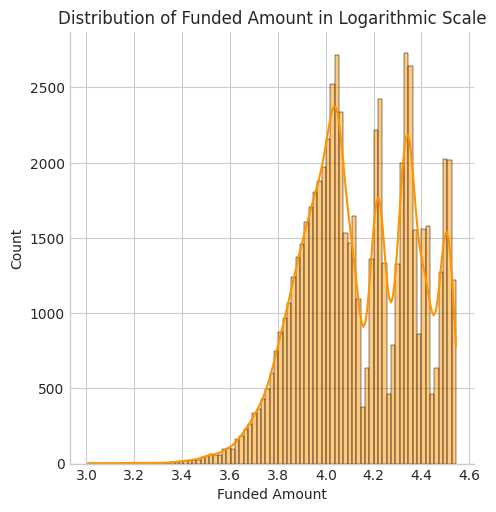

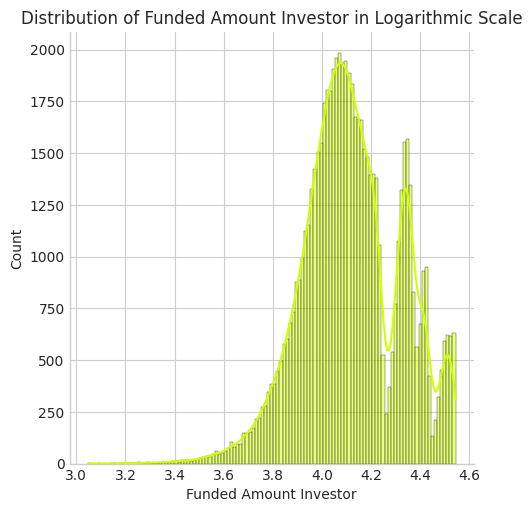

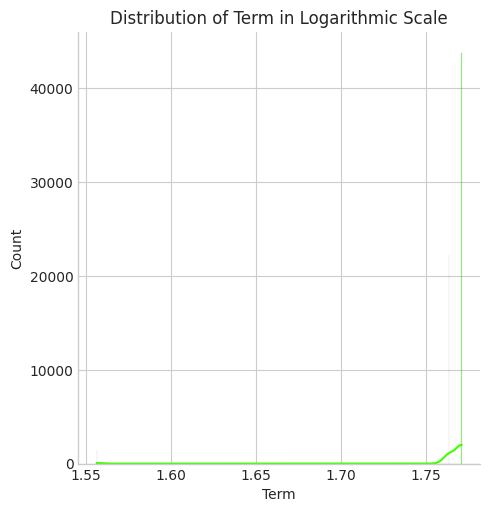

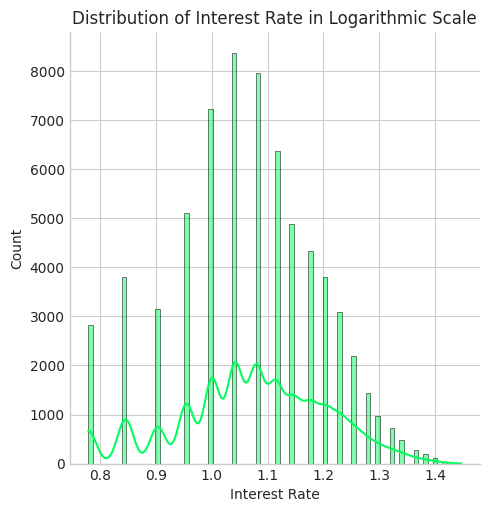

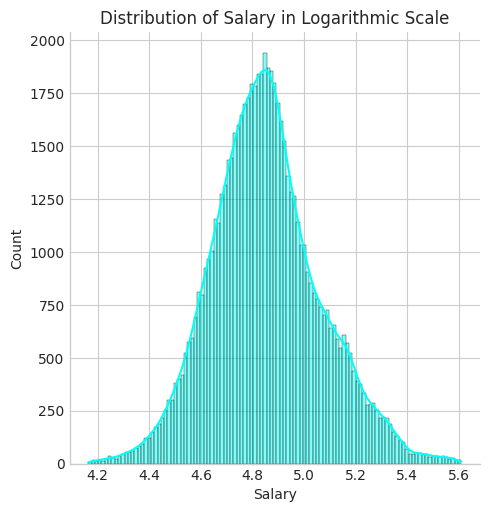

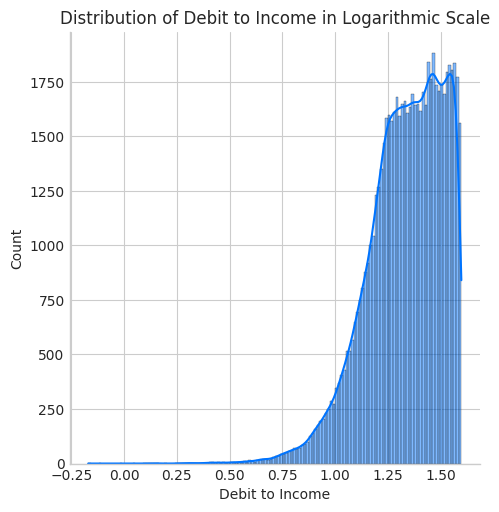

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


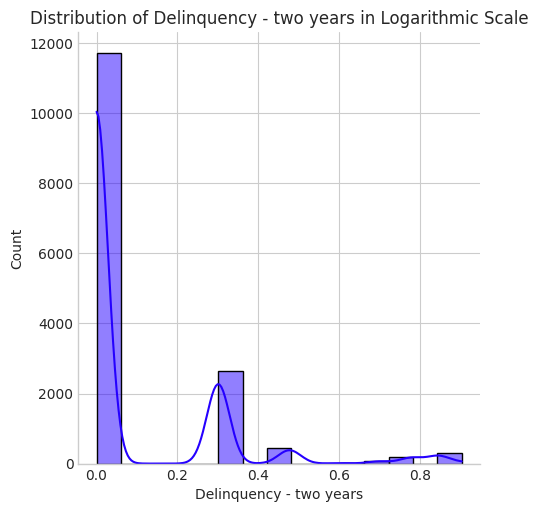

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


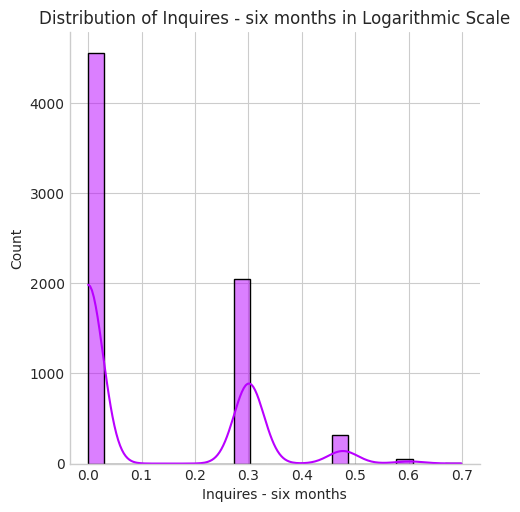

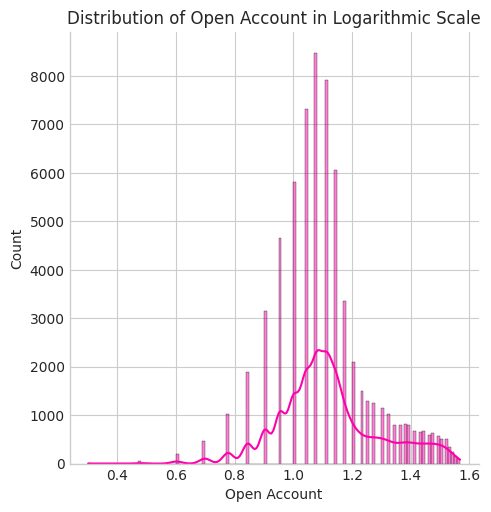

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


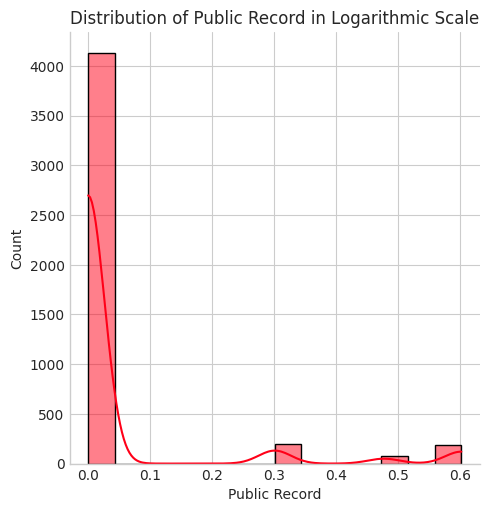

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


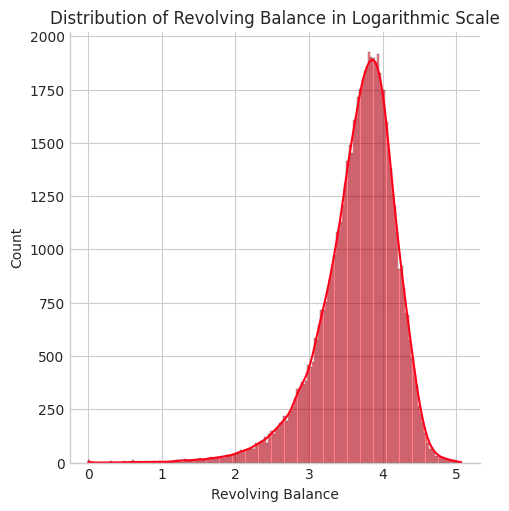

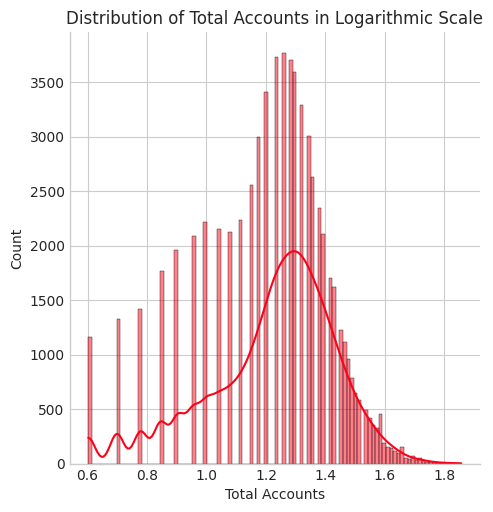

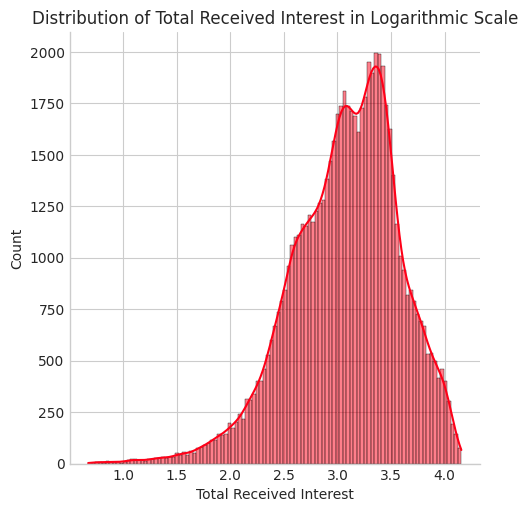

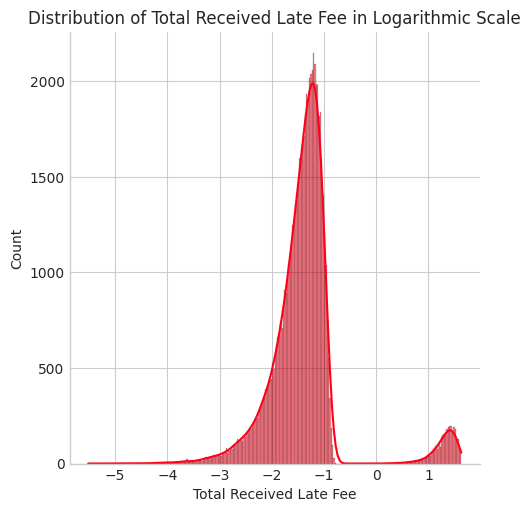

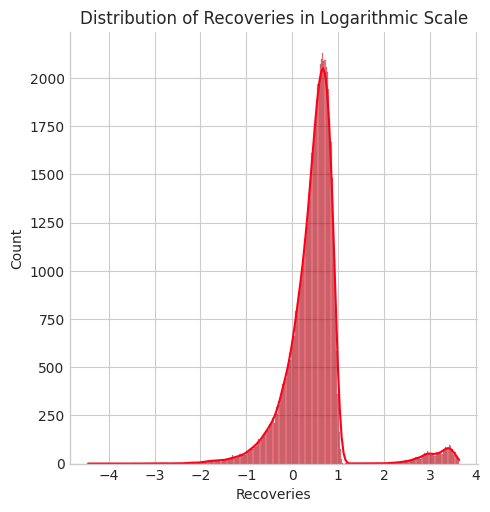

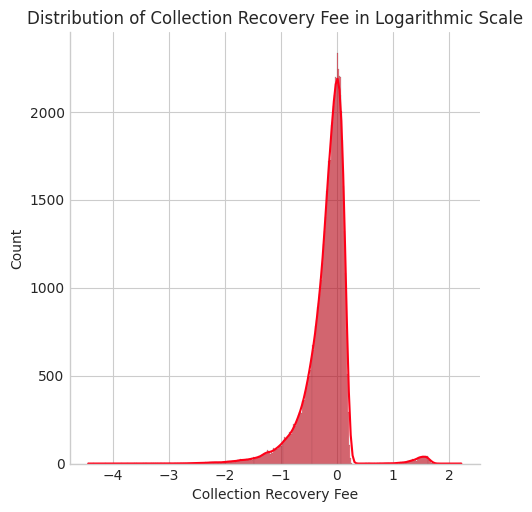

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


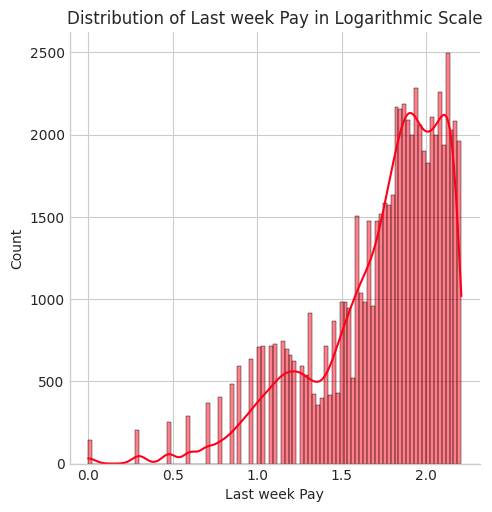

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


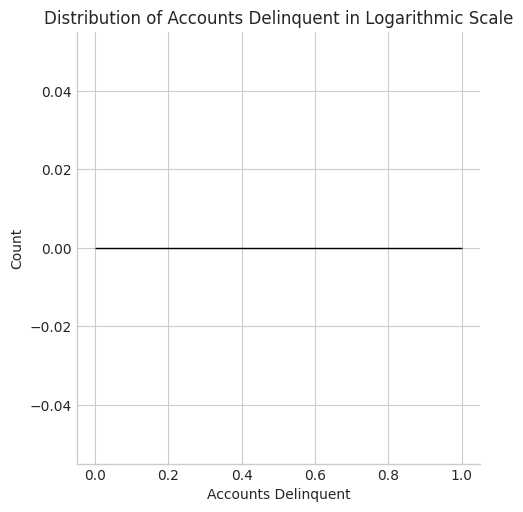

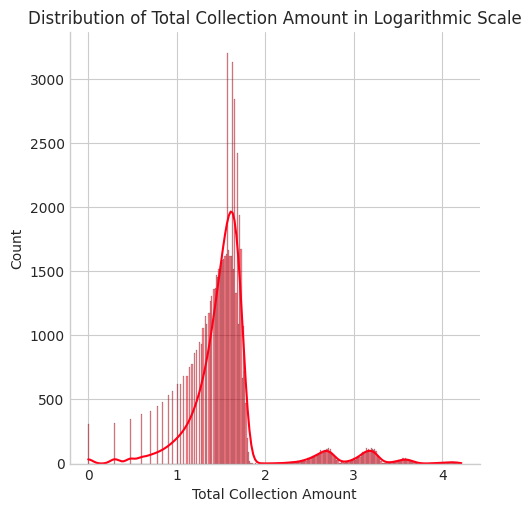

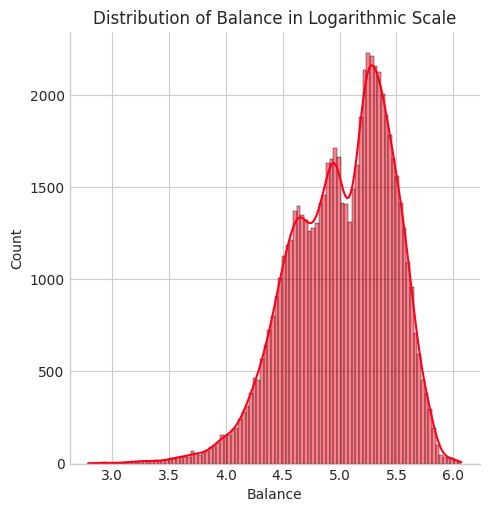

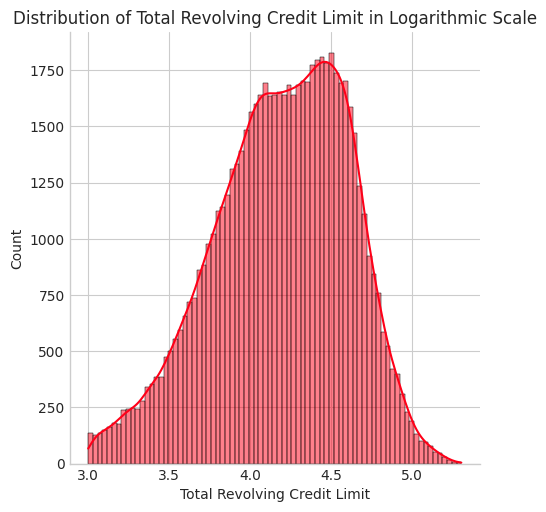

In [35]:
df_integ=df.drop(['Grade','Sub Grade','HomeOwnership','Verification Status','Payment Plan','Loan Title','Initial List Status',
                 'Loan Category'],axis=1)
columns=['Amount','Funded Amount',"Funded Amount Investor",'Term','Interest Rate','Salary','Debit to Income'
          ,'Delinquency - two years',"Inquires - six months","Open Account","Public Record",'Revolving Balance'
          ,'Total Accounts','Total Received Interest',"Total Received Late Fee",'Recoveries',
          'Collection Recovery Fee','Last week Pay','Accounts Delinquent',"Total Collection Amount","Balance",
          "Total Revolving Credit Limit"]
col=cm.get_cmap('hsv')
val=0
for i in columns:
    sns.displot(x=np.log10(df_integ[i]), kde=True,color=col(val))
    plt.title('Distribution of '+i+' in Logarithmic Scale')
    plt.show()
    val+=0.1

In [36]:
normal_columns = ['Amount', 'Debit to Income', 'Last week Pay']
log_columns= ['Funded Amount Investor', 'Interest Rate', 'Salary', "Inquires - six months", 'Open Account', 
              'Revolving Balance','Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 
              'Recoveries', 'Collection Recovery Fee', 'Total Collection Amount']

for i in log_columns:
    df_integ[i]=np.log10(df_integ[i])


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
drop_columns=['Funded Amount','Term','Delinquency - two years',"Public Record",'Accounts Delinquent',"Total Revolving Credit Limit"]
df.drop(drop_columns, axis=1,inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount Investor        67463 non-null  float64
 2   Interest Rate                 67463 non-null  float64
 3   Grade                         67463 non-null  object 
 4   Sub Grade                     67463 non-null  object 
 5   HomeOwnership                 67463 non-null  object 
 6   Salary                        67463 non-null  float64
 7   Verification Status           67463 non-null  object 
 8   Payment Plan                  67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Inquires - six months         67463 non-null  int64  
 12  Open Account                  67463 non-null  int64  
 13  R

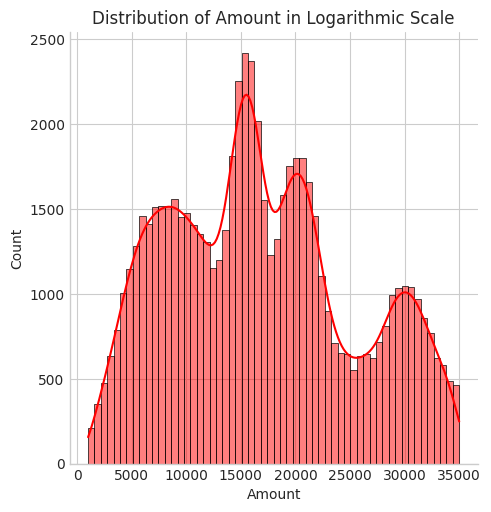

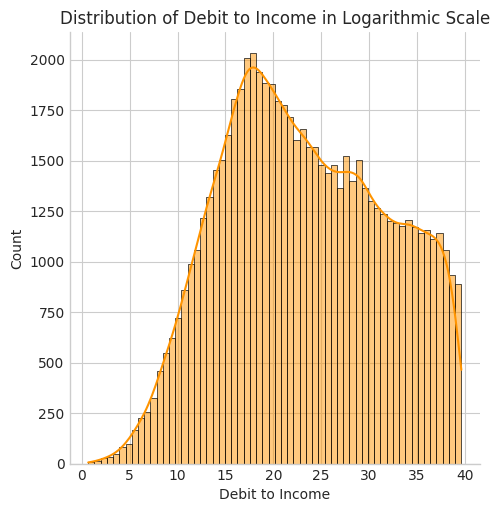

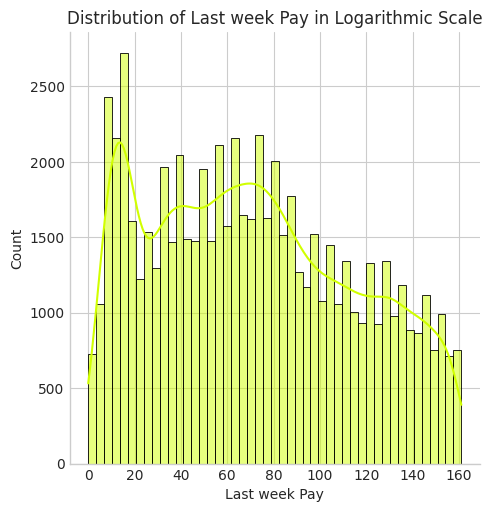

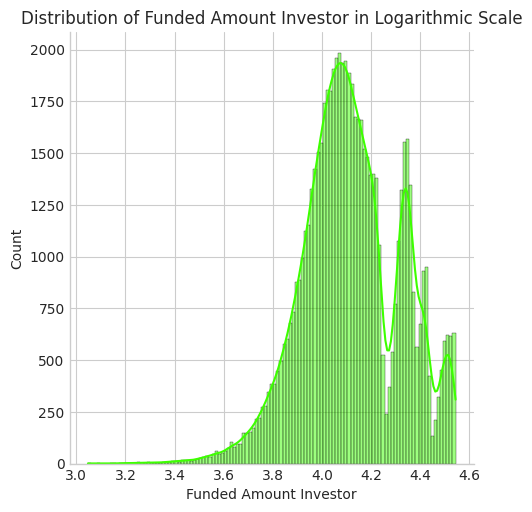

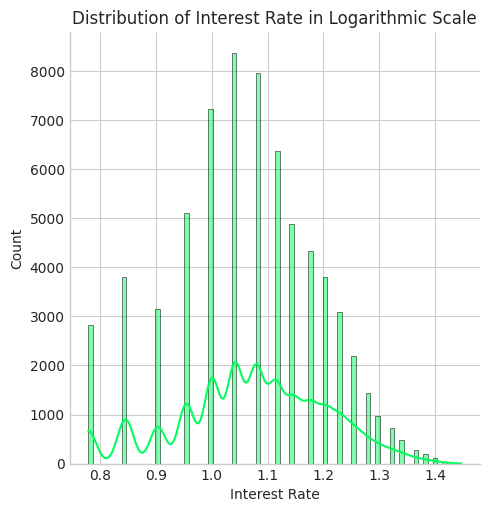

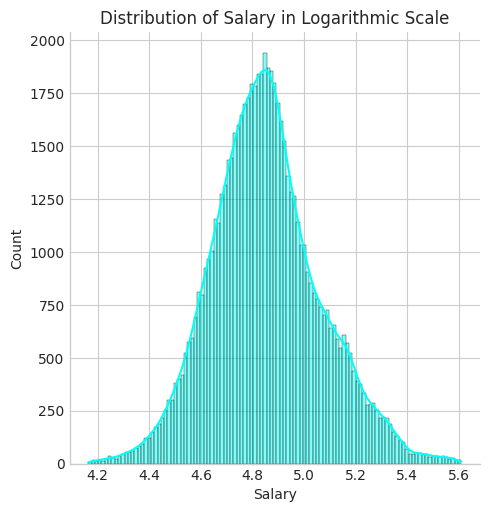

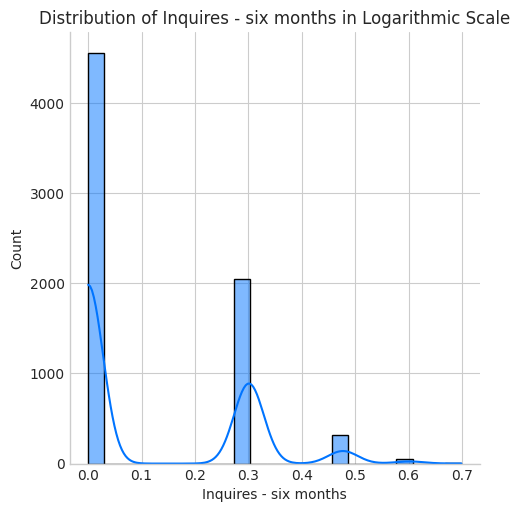

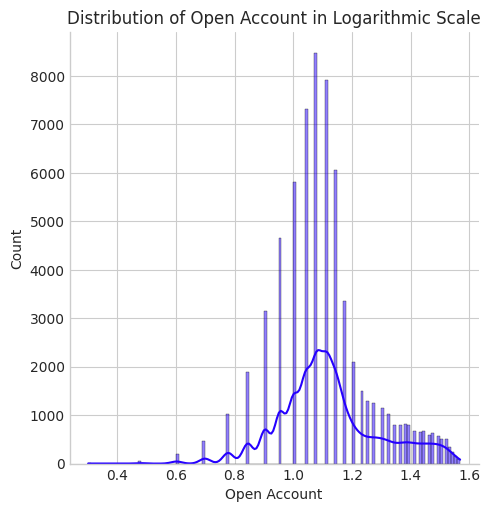

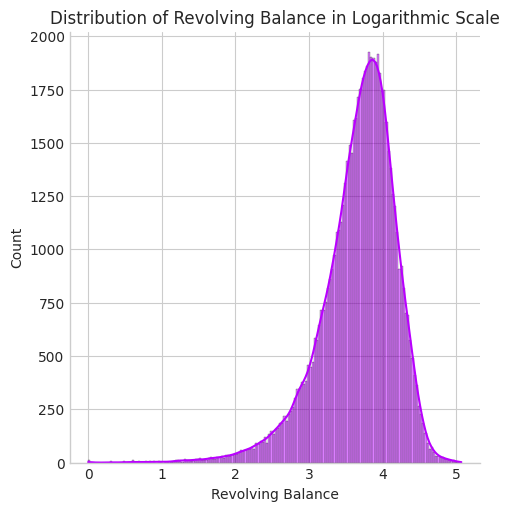

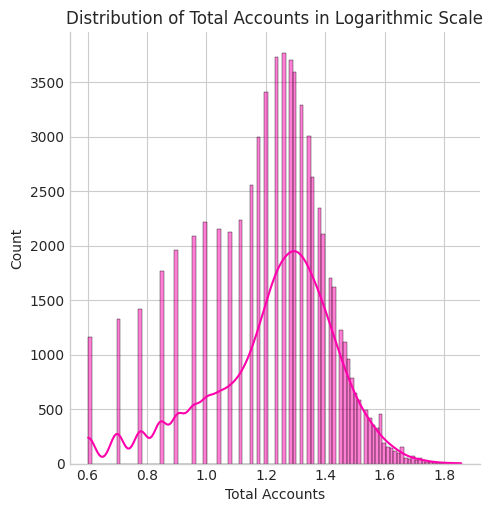

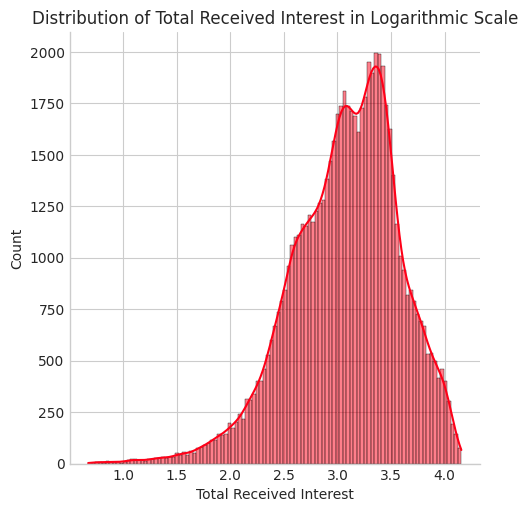

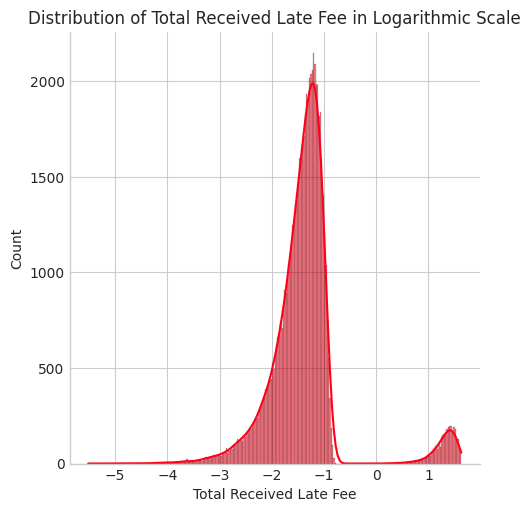

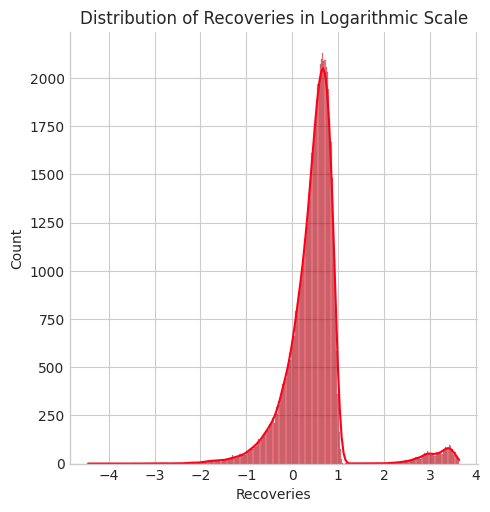

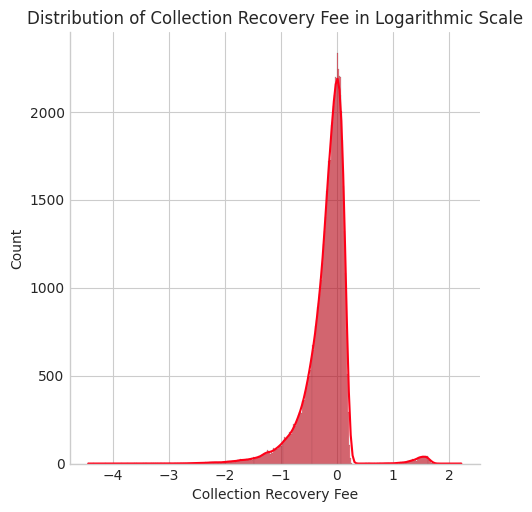

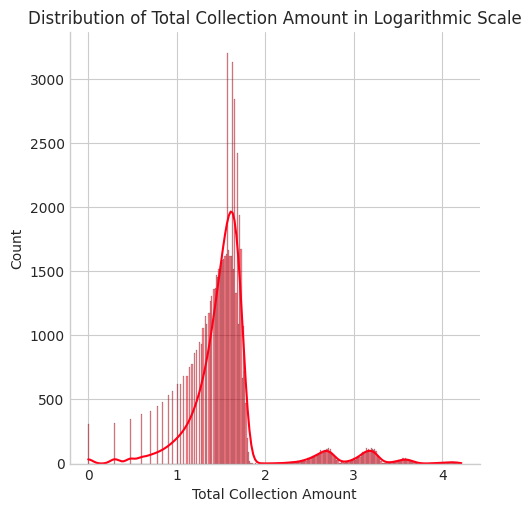

In [39]:
numeric_columns=['Amount', 'Debit to Income', 'Last week Pay','Funded Amount Investor', 'Interest Rate', 'Salary', "Inquires - six months", 'Open Account', 
              'Revolving Balance','Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 
              'Recoveries', 'Collection Recovery Fee', 'Total Collection Amount']
val=0
for i in numeric_columns:
    sns.displot(x=(df_integ[i]), kde=True,color=col(val))
    plt.title('Distribution of '+i+' in Logarithmic Scale')
    plt.show()
    val+=0.1

In [40]:
for i in numeric_columns:
    df[i]=df_integ[i]

## Violin Plot Distribution

### Default Ratio Analysis based on Grade Distribution

Upon examination of the defaulted ratio across different loan grades, we observe a relatively consistent pattern with minor variations, particularly in Grades G and F.

### Default Ratio Analysis based on Sub Grade Distribution

Similarly, the defaulted ratio remains consistent across different sub-grades.

### Default Ratio Analysis based on Home Ownership Distribution

Similarly, the defaulted ratio remains consistent across different ownerships.

### Default Ratio Analysis based on Verification Status

Similarly, the defaulted ratio remains consistent across different Verification Status.

### Default Ratio Analysis based on Initial List Status

Similarly, the defaulted ratio remains consistent across different Initial List Status.

### Timely Repayment Dominance

Notably, the majority of loans exhibit timely repayment, as evidenced by the distribution analysis.

<span style="color:green">*Insight: The overall stability in default ratios across various categorical distributions indicates a general trend of timely repayments, with only minor variations in specific grade categories.*</span>


### Irrelevance of Repayment Plan and Loan Title
#### We will drop these columns

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount Investor        67463 non-null  float64
 2   Interest Rate                 67463 non-null  float64
 3   Grade                         67463 non-null  object 
 4   Sub Grade                     67463 non-null  object 
 5   HomeOwnership                 67463 non-null  object 
 6   Salary                        67463 non-null  float64
 7   Verification Status           67463 non-null  object 
 8   Payment Plan                  67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Inquires - six months         67463 non-null  float64
 12  Open Account                  67463 non-null  float64
 13  R

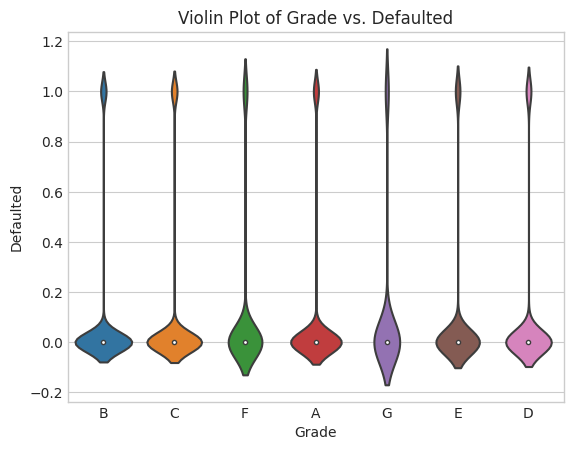

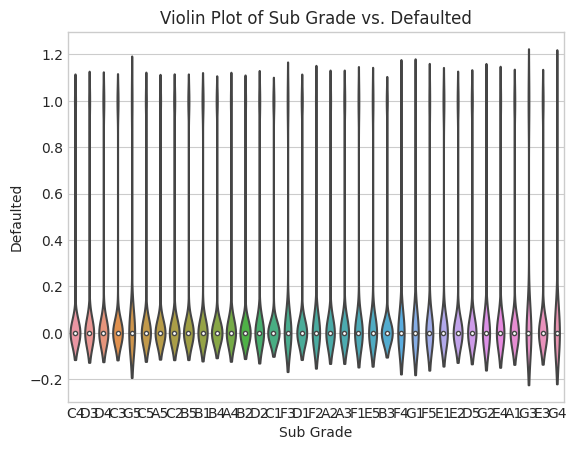

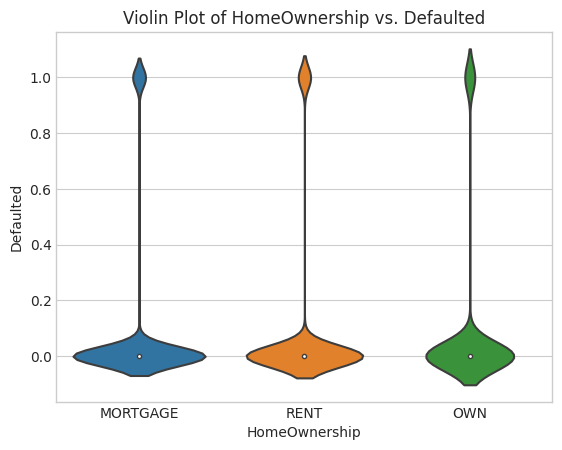

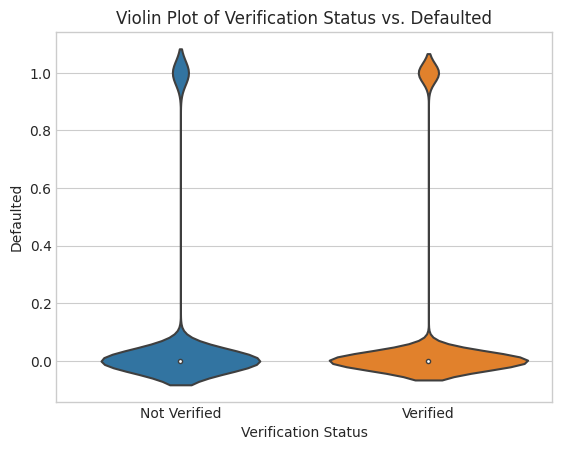

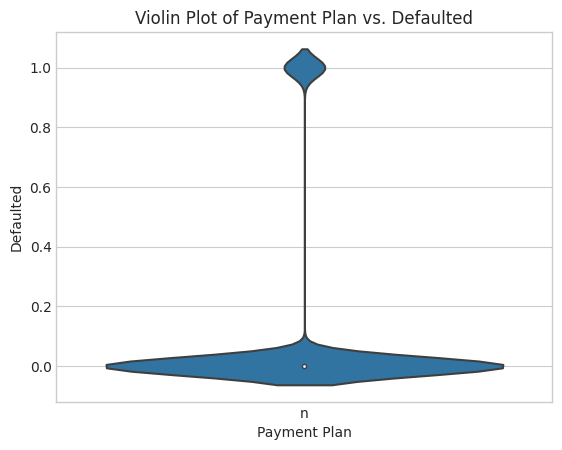

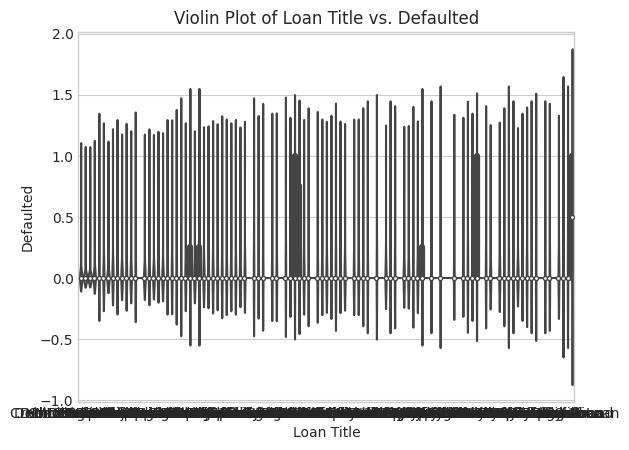

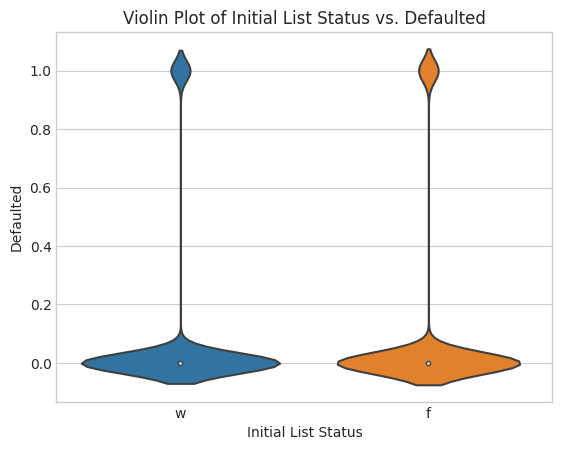

In [42]:
str_columns=['Grade','Sub Grade','HomeOwnership','Verification Status','Payment Plan','Loan Title','Initial List Status']
for i in str_columns:
    sns.violinplot(x=i, y="Defaulted", data=df)
    plt.title('Violin Plot of '+ i+' vs. Defaulted');
    plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount Investor        67463 non-null  float64
 2   Interest Rate                 67463 non-null  float64
 3   Grade                         67463 non-null  object 
 4   Sub Grade                     67463 non-null  object 
 5   HomeOwnership                 67463 non-null  object 
 6   Salary                        67463 non-null  float64
 7   Verification Status           67463 non-null  object 
 8   Payment Plan                  67463 non-null  object 
 9   Loan Title                    67463 non-null  object 
 10  Debit to Income               67463 non-null  float64
 11  Inquires - six months         67463 non-null  float64
 12  Open Account                  67463 non-null  float64
 13  R

In [44]:
df.drop(['Loan Title','Payment Plan','Loan Category'],axis=1, inplace=True)

# Data Preprocessing

## Converting Categorical Variables into Numerical Variables

In the process of preparing our data for analysis, we have made decisions regarding certain categorical variables:

- We opt not to use the "Loan Category" column due to its high correlation with the "Amount" column.
  
- For simplicity reasons, we exclude the "Loan Title," "Payment Plan," and "Verification Status" columns from our analysis.


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount                        67463 non-null  int64  
 1   Funded Amount Investor        67463 non-null  float64
 2   Interest Rate                 67463 non-null  float64
 3   Grade                         67463 non-null  object 
 4   Sub Grade                     67463 non-null  object 
 5   HomeOwnership                 67463 non-null  object 
 6   Salary                        67463 non-null  float64
 7   Verification Status           67463 non-null  object 
 8   Debit to Income               67463 non-null  float64
 9   Inquires - six months         67463 non-null  float64
 10  Open Account                  67463 non-null  float64
 11  Revolving Balance             67463 non-null  float64
 12  Total Accounts                67463 non-null  float64
 13  I

In [46]:
df.drop('Collection 12 months Medical',axis=1,inplace=True)

In [47]:
categorical_variables=['Grade','Sub Grade',"HomeOwnership",'Initial List Status','Verification Status']
df_encode=pd.get_dummies(data=df, columns=categorical_variables,prefix='Col',drop_first=True,prefix_sep="_", dtype='int8')



In [48]:
df_encode

,Amount,Funded Amount Investor,Interest Rate,Salary,Debit to Income,Inquires - six months,Open Account,Revolving Balance,Total Accounts,Total Received Interest,...,Col_F5,Col_G1,Col_G2,Col_G3,Col_G4,Col_G5,Col_OWN,Col_RENT,Col_w,Col_Verified
0,10000,4.090941,1.079181,5.246367,16.284758,-inf,1.113943,4.384640,0.845098,3.466815,...,0,0,0,0,0,0,0,0,1,0
1,3609,4.086075,1.113943,4.600253,15.412409,-inf,1.079181,2.909556,1.113943,2.888050,...,0,0,0,0,0,0,0,1,0,1
2,28276,4.334519,1.113943,4.961453,28.137619,-inf,1.146128,3.265525,1.301030,2.936174,...,0,0,0,0,0,0,0,0,1,1
3,11170,4.252298,1.230449,5.034575,18.043730,-inf,0.845098,4.140477,1.079181,2.459654,...,0,0,0,0,0,0,0,0,1,1
4,16890,4.131616,1.204120,4.645764,17.209886,0.477121,1.113943,3.188647,1.342423,2.111395,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,4.119760,1.000000,4.924078,28.105127,-inf,1.113943,3.614053,1.278754,3.296434,...,0,0,0,0,0,0,0,0,1,1
67459,8323,4.194166,1.000000,4.816182,17.694279,-inf,1.079181,3.988425,1.146128,3.491474,...,0,0,0,0,0,0,0,1,1,1
67460,15897,4.090944,1.301030,4.541754,10.295774,-inf,0.845098,3.341435,0.954243,3.430074,...,0,0,0,0,0,0,0,0,1,1
67461,16567,4.329473,1.146128,4.986498,7.614624,-inf,1.146128,3.068928,1.176091,3.563402,...,0,0,0,0,0,0,1,0,0,0


In [49]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Amount                   67463 non-null  int64  
 1   Funded Amount Investor   67463 non-null  float64
 2   Interest Rate            67463 non-null  float64
 3   Salary                   67463 non-null  float64
 4   Debit to Income          67463 non-null  float64
 5   Inquires - six months    67463 non-null  float64
 6   Open Account             67463 non-null  float64
 7   Revolving Balance        67463 non-null  float64
 8   Total Accounts           67463 non-null  float64
 9   Total Received Interest  67463 non-null  float64
 10  Total Received Late Fee  67463 non-null  float64
 11  Recoveries               67463 non-null  float64
 12  Collection Recovery Fee  67463 non-null  float64
 13  Last week Pay            67463 non-null  int64  
 14  Total Collection Amoun

In [50]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['Amount' 'Funded Amount Investor' 'Interest Rate' 'Grade' 'Sub Grade'
 'HomeOwnership' 'Salary' 'Verification Status' 'Debit to Income'
 'Inquires - six months' 'Open Account' 'Revolving Balance'
 'Total Accounts' 'Initial List Status' 'Total Received Interest'
 'Total Received Late Fee' 'Recoveries' 'Collection Recovery Fee'
 'Last week Pay' 'Total Collection Amount' 'Balance' 'Defaulted']

Number of rows and columns in the dataset: (67463, 22)

Columns in data frame after encoding dummy variable:
 ['Amount' 'Funded Amount Investor' 'Interest Rate' 'Salary'
 'Debit to Income' 'Inquires - six months' 'Open Account'
 'Revolving Balance' 'Total Accounts' 'Total Received Interest'
 'Total Received Late Fee' 'Recoveries' 'Collection Recovery Fee'
 'Last week Pay' 'Total Collection Amount' 'Balance' 'Defaulted' 'Col_B'
 'Col_C' 'Col_D' 'Col_E' 'Col_F' 'Col_G' 'Col_A2' 'Col_A3' 'Col_A4'
 'Col_A5' 'Col_B1' 'Col_B2' 'Col_B3' 'Col_B4' 'Col_B5' 'Col_C1' 'Col_C2'

### Box-Cox Transformation

To address non-normally distributed dependent variables, such as the "Balance" column, we employ the Box-Cox transformation. This transformation aims to achieve a more normal distribution for the specified variables.

<span style="color:purple">*Note: Utilizing the Box-Cox transformation is a common technique to enhance the normality of variables, contributing to improved model performance and interpretability.*</span>


In [51]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['Balance'],alpha=0.05)

In [52]:
ci,lam

((0.21540051534230392, 0.22914890528844536), 0.22226726875377953)

In [53]:
df_encode['Balance']= np.log(df_encode['Balance']) 


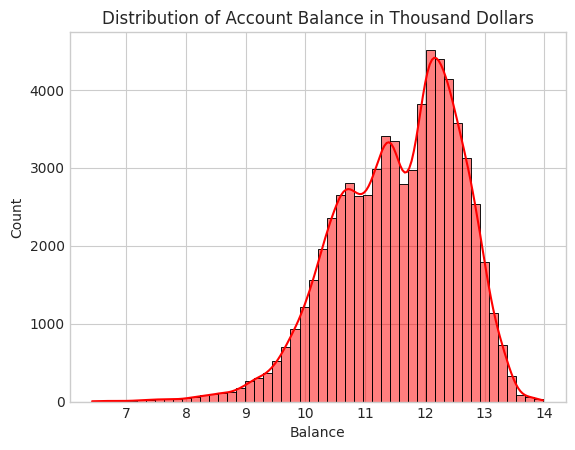

In [54]:
sns.histplot(df_encode['Balance'],bins=50,color='r', kde=True)

plt.title('Distribution of Account Balance in Thousand Dollars');


In [55]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Amount                   67463 non-null  int64  
 1   Funded Amount Investor   67463 non-null  float64
 2   Interest Rate            67463 non-null  float64
 3   Salary                   67463 non-null  float64
 4   Debit to Income          67463 non-null  float64
 5   Inquires - six months    67463 non-null  float64
 6   Open Account             67463 non-null  float64
 7   Revolving Balance        67463 non-null  float64
 8   Total Accounts           67463 non-null  float64
 9   Total Received Interest  67463 non-null  float64
 10  Total Received Late Fee  67463 non-null  float64
 11  Recoveries               67463 non-null  float64
 12  Collection Recovery Fee  67463 non-null  float64
 13  Last week Pay            67463 non-null  int64  
 14  Total Collection Amoun

# Cross Validation



### Model Choice: Logistic Regression

Given that our dependent variable is binary, we opt for a Logistic Regression model. This choice aligns with the nature of our problem, where we aim to predict a boolean outcome.

<span style="color:green">*Note: Logistic Regression and Decision Tree are well-suited for binary classification tasks and will be employed to predict the boolean outcome in our dataset.*</span>


In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn import tree



In [57]:
df_encode.drop(['Inquires - six months','Revolving Balance'],axis=1,inplace=True)


In [58]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Amount                   67463 non-null  int64  
 1   Funded Amount Investor   67463 non-null  float64
 2   Interest Rate            67463 non-null  float64
 3   Salary                   67463 non-null  float64
 4   Debit to Income          67463 non-null  float64
 5   Open Account             67463 non-null  float64
 6   Total Accounts           67463 non-null  float64
 7   Total Received Interest  67463 non-null  float64
 8   Total Received Late Fee  67463 non-null  float64
 9   Recoveries               67463 non-null  float64
 10  Collection Recovery Fee  67463 non-null  float64
 11  Last week Pay            67463 non-null  int64  
 12  Total Collection Amount  67463 non-null  float64
 13  Balance                  67463 non-null  float64
 14  Defaulted             

In [59]:

X= df_encode.drop('Defaulted', axis=1)
y=df_encode['Defaulted']

In [60]:
smote=SMOTE()
smote.fit(X,y)
X,y=smote.fit_resample(X,y)

In [61]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)

In [62]:
lgr = LogisticRegression(max_iter=500)
tr = tree.DecisionTreeClassifier()

In [63]:
skf= StratifiedKFold(n_splits=5, shuffle=True, random_state=40)
lst_accu_stratified_lgr=[]
lst_accu_stratified_tr=[]

lst_fpr=[]
lst_tpr=[]

In [64]:
for train_index, test_index in skf.split(x_scaled, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lgr.fit(x_train_fold,y_train_fold)
    tr.fit(x_train_fold,y_train_fold)
    y_pred_fold_lgr= lgr.predict_proba(x_test_fold)[:,1]
    aucroc_lgr = roc_auc_score(y_test_fold, y_pred_fold_lgr)
    lst_accu_stratified_lgr.append(aucroc_lgr)

    

In [65]:
# Print the output.
print('List of possible accuracy in Logistic Regression:', lst_accu_stratified_lgr)
print('\nMaximum Accuracy That can be obtained from this Logistic Regression is:',
      max(lst_accu_stratified_lgr)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified_lgr)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified_lgr)*100, '%')




List of possible accuracy in Logistic Regression: [0.9436619817888319, 0.942435057732463, 0.9427020729580602, 0.9424563479830088, 0.9448275927853135]

Maximum Accuracy That can be obtained from this Logistic Regression is: 94.48275927853135 %

Minimum Accuracy: 94.24350577324631 %

Overall Accuracy: 94.32166106495356 %


# Random Forest Classifier Evaluation

## Results

Our Random Forest Classifier achieved an impressive accuracy of **<span style="color: green;">96%</span>**, signifying its efficacy as a robust model for the given task.

### Conclusion

With a high accuracy rate of **<span style="color: green;">96%</span>**, the Random Forest Classifier demonstrates strong predictive capabilities, suggesting its suitability for the dataset. This result indicates the model's potential as a reliable choice for further analysis or application.


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:

rfc = RandomForestClassifier( random_state=42)

In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_pred_rfc= rfc.predict_proba(X_test)[:,1]


In [70]:
aucroc_rfc = roc_auc_score(y_test, y_pred_rfc)
aucroc_rfc


0.9570326293693852

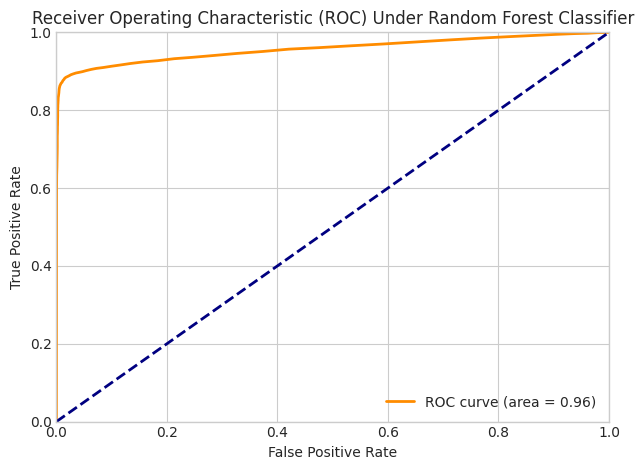

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)
roc_auc_rfc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
          label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Under Random Forest Classifier')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Decision Tree Evaluation

**Accuracy: <span style="color: green;">86%</span>**

Our Decision Tree model demonstrated a robust **<span style="color: green;">86% accuracy</span>** in predicting outcomes, showcasing its effectiveness in handling the given data.

*Conclusion:*

In summary, the Decision Tree's strong predictive performance at **<span style="color: green;">86% accuracy</span>** establishes it as a reliable choice for this task. Further analysis may provide additional insights, but this result indicates a solid foundation for our model.


In [72]:
dt= tree.DecisionTreeClassifier()

In [73]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred_dt= dt.predict_proba(X_test)[:,1]


In [75]:
aucroc_dt = roc_auc_score(y_test, y_pred_dt)
aucroc_dt


0.8628105997319501

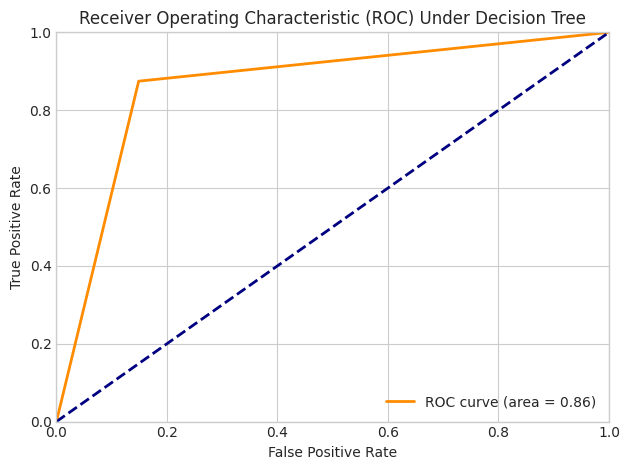

In [76]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
          label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Under Decision Tree')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()